In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pybaselines import Baseline, utils
import spectra_processing

In [2]:
test_df = pd.read_csv('raw/0048.csv')
x = test_df.iloc[578:2387,0]
y = test_df.iloc[578:2387,1]

In [3]:
baseline_fitter = Baseline(x_data=x)
bkg_1, params_1 = spectra_processing.bkg_fitting("modpoly",x,y)
bkg_2, params_2 = spectra_processing.bkg_fitting("asls",x,y)
bkg_3, params_3 = spectra_processing.bkg_fitting("mor",x,y)
bkg_4, params_4 = spectra_processing.bkg_fitting("snip",x,y)

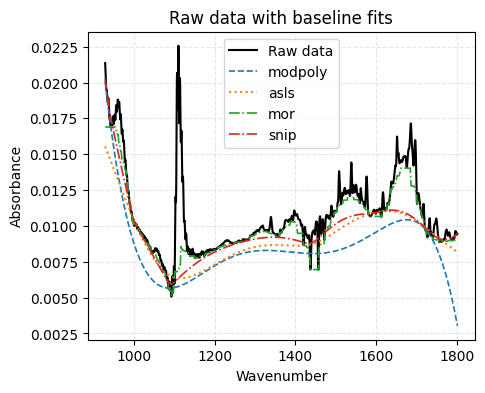

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))

# Plot raw data (solid black)
ax.plot(x, y, 'k', lw=1.5, label='Raw data')

# Plot each baseline with distinct styles
ax.plot(x, bkg_1, '--', lw=1.2, label='modpoly')
ax.plot(x, bkg_2, ':',  lw=1.5, label='asls')
ax.plot(x, bkg_3, '-.', lw=1.2, label='mor')
ax.plot(x, bkg_4, '-.', lw=1.2, label='snip')

# Labels and legend
ax.set_title("Raw data with baseline fits")
ax.set_xlabel("Wavenumber")
ax.set_ylabel("Absorbance")
ax.legend()
ax.grid(alpha=0.3, linestyle="--")

plt.show()

In [ ]:
spectra_processing.combining_series()

In [5]:
df = pd.read_csv('combined_raw.csv')

In [11]:
cols = [2,4,7,13,19,49,97]

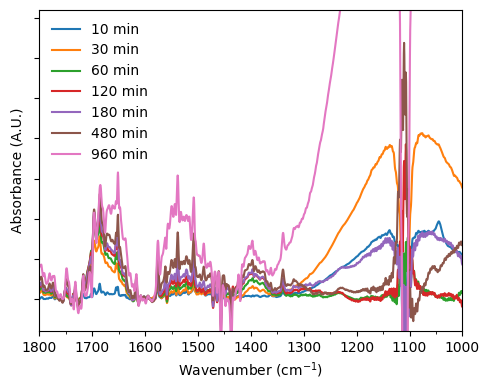

In [27]:
wave_range = (1000,1800)
abs_low_selected = spectra_processing.columns_selection(df,wave_range=wave_range,cols=cols)
abs_low_bkg_subtracted = spectra_processing.bkg_substraction(abs_low_selected,fitter='asls')
abs_low_bkg_subtracted.to_csv(f"selected_{wave_range}_bkg_subtracted.csv", index=False)
spectra_processing.plot_columns(abs_low_bkg_subtracted, wave_range, ylim=[-0.002,0.018], reverse_x=True)

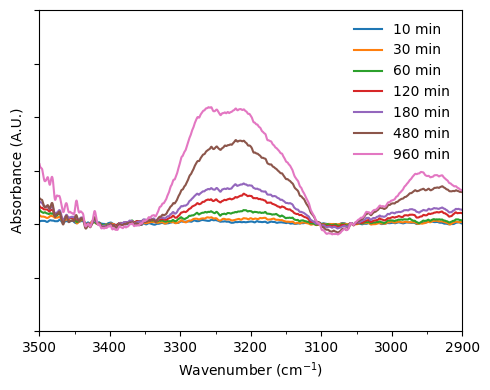

In [28]:
wave_range = (2900,3500)

abs_high_selected = spectra_processing.columns_selection(df,wave_range=wave_range,cols=cols)
abs_high_bkg_subtracted = spectra_processing.bkg_substraction(abs_high_selected,fitter='asls')
abs_high_bkg_subtracted.to_csv(f"selected_{wave_range}_bkg_subtracted.csv", index=False)
spectra_processing.plot_columns(abs_high_bkg_subtracted, wave_range, ylim=[-0.002,0.004], reverse_x=True)